In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

%matplotlib inline

In [8]:
# Loading the Santander Customer satisfaction dataset from Kaggle
data=pd.read_csv('datasets/santander.csv')
data.shape

(76020, 371)

In [36]:
# Separate dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['TARGET'],axis=1),
                                              data['TARGET'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((53214, 370), (22806, 370))

In [37]:
# Creating a list of all constant features with 0 STD DEV.
constant_features=[feat for feat in x_train.columns if x_train[feat].std()==0]

# Exploring constant feature
data['ind_var2_0'].unique()

array([0])

In [38]:
# Removing all the constant features columns from the df
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [39]:
#  Successfully removed almost 38 constant features
x_train.shape,x_test.shape

((53214, 332), (22806, 332))

### Removing quasi-static features with 99% observation appr data

In [40]:
sel=VarianceThreshold(threshold=0.01)
sel.fit(x_train)

#how many not quasi-constant
sum(sel.get_support())

268

In [41]:
# Total quasi-constant features
t=list(sel.get_support())
t.count(0)

64

In [42]:
# keep the list of features to keep
features_to_keep=x_train.columns[sel.get_support()]

In [43]:
# We can remove this feature from the df 
# We have removed a total of 70 features so far
x_train=sel.transform(x_train)
x_test=sel.transform(x_test)
x_train.shape,x_test.shape

((53214, 268), (22806, 268))

In [44]:
# sklearn transformation leads to np array 
type(x_train)

numpy.ndarray

In [45]:
# Converting back to df
x_train=pd.DataFrame(x_train,columns=features_to_keep)
x_test=pd.DataFrame(x_test,columns=features_to_keep)

x_train.shape,x_test.shape

((53214, 268), (22806, 268))

### Removing all the duplicate feautes from the DF

In [48]:
# Check for the duplicate features
duplicated_feat=[]
# Can use set as well inplace of list for removing redundant columns
  
for i in range(len(x_train.columns)):
    # To know code is running
    if i%10==0:
        print(i)
        
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            duplicated_feat.append(col2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260


16

In [49]:
# Removing all the duplicate features
x_train.drop(labels=duplicated_feat,axis=1,inplace=True)
x_test.drop(labels=duplicated_feat,axis=1,inplace=True)

# Successfully removed 16 duplicated features
# Intotal we have removed almost 118 features 
x_train.shape,x_test.shape

((53214, 252), (22806, 252))

In [58]:
# Keep the copy of df except constant and duplicated features to measure the performance at the end
x_train_basic_filter=x_train.copy()
x_test_basic_filter=x_test.copy()

### Removing all the Correlated features

### Visualising Correlation

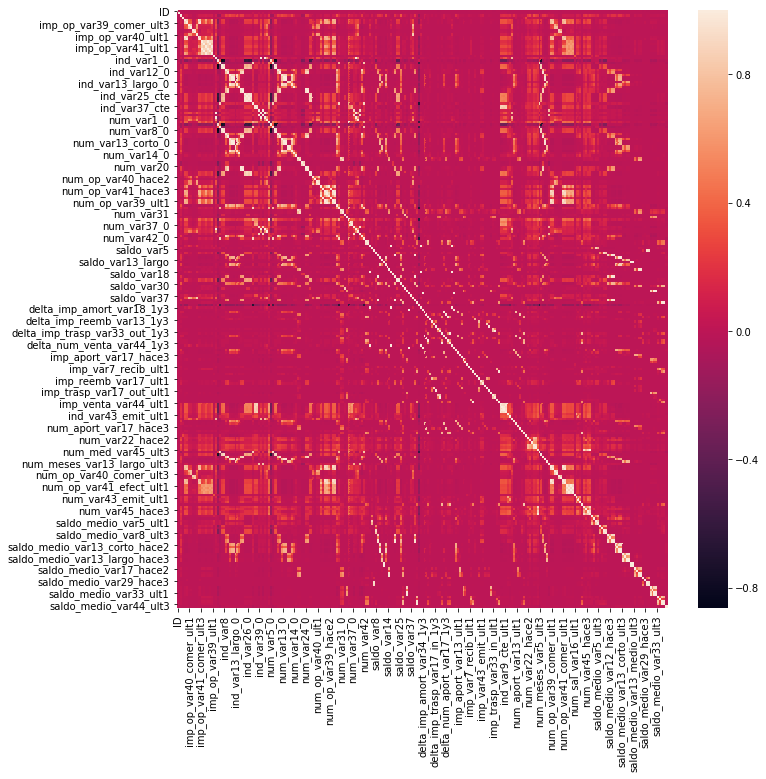

In [65]:
# creating correlation
corr_matrix=x_train.corr()

fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_matrix)

In [67]:
corr_matrix.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.002694,-0.001429,-0.004771,0.003904,0.001377,-0.004445,-0.004665,-0.007750,-0.006784,...,-0.009078,0.007105,0.007444,0.003968,0.004385,-0.003306,0.000275,-0.000197,0.001404,-0.002467
var3,-0.002694,1.000000,-0.003769,0.001790,0.005309,0.006322,0.001540,0.001697,0.000536,0.000632,...,0.000280,0.000738,0.000553,0.000732,0.000770,0.000642,0.000465,0.000769,0.000805,0.000140
var15,-0.001429,-0.003769,1.000000,0.042432,0.095696,0.101386,0.042572,0.045842,0.008120,0.009172,...,0.013782,0.027528,0.018402,0.028426,0.029238,0.031925,0.019212,0.034742,0.034995,0.004416
imp_ent_var16_ult1,-0.004771,0.001790,0.042432,1.000000,0.042590,0.035779,0.013211,0.012599,-0.000342,0.000678,...,0.008953,-0.000910,-0.000684,-0.000888,-0.000931,0.003087,-0.000595,0.006117,0.008007,-0.000348
imp_op_var39_comer_ult1,0.003904,0.005309,0.095696,0.042590,1.000000,0.889181,0.353187,0.304416,0.029921,0.051720,...,0.001317,0.023219,0.019279,0.018805,0.020868,0.010844,0.008638,0.013411,0.012702,0.009369


In [60]:
# find and remove correlated Features
def correlation(dataset,threshold):
    col_corr=set()    # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]    # Getting the name of the columns
                col_corr.add(colname)
    return col_corr